# Tugas Lab 2 Pengolahan Citra
**Nama: Ghifari Aulia Azhar Riza**  
**NPM: 1906306773**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper
from scipy import fftpack as fp
from skimage import io, color, util
import warnings
warnings.filterwarnings("ignore")

## 1. [45] Terapkan minimal 2 Low Pass dan 2 High Pass Filter terhadap citra lamp.jpg, gunakan dua nilai D0 yang berbeda pada masing-masing filter!

### a. [5] Tampilkan citra tersebut pada domain frekuensi!

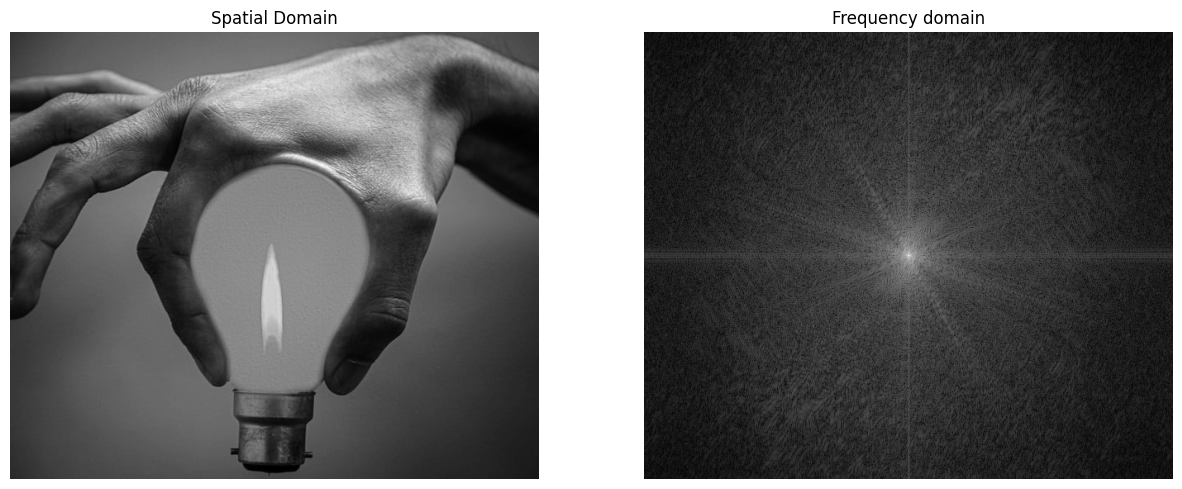

In [2]:
lamp = io.imread("lamp.jpg")
lamp_gray = color.rgb2gray(lamp)

# fourier transform
fourier = fp.fft2(lamp_gray)

# Calculate magnitude of imaginary and real numbers
ft = abs(fourier)

# Scale image
ft = np.log(1 + ft)

# shift to center 
ft = fp.fftshift(ft)

# show image
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title("Spatial Domain")
plt.imshow(lamp_gray, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Frequency domain")
plt.imshow(ft, cmap="gray")
plt.axis("off")
plt.show()

### b. [17] Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya!

In [3]:
w, l = helper.paddedsize(lamp_gray.shape[0], lamp_gray.shape[1])

# Create butterworth lowpass filter
h1 = helper.lpfilter('btw', w, l, 0.05 * w)
h2 = helper.lpfilter('btw', w, l, 0.1 * w)

# Create ideal lowpass filter
h3 = helper.lpfilter('ideal', w, l, 0.05 * w)
h4 = helper.lpfilter('ideal', w, l, 0.1 * w)

# Calculate DFT
f = fp.fft2(lamp_gray,(w,l))

# Apply lowpass filter
LPFS_1 = h1 * f
LPFS_2 = h2 * f
LPFS_3 = h3 * f
LPFS_4 = h4 * f

# Calculate IDFT for spatial domain transformation
LPF_1 = fp.ifft2(LPFS_1).real
LPF_1 = LPF_1[:lamp_gray.shape[0],:lamp_gray.shape[1]]

LPF_2 = fp.ifft2(LPFS_2).real
LPF_2 = LPF_2[:lamp_gray.shape[0],:lamp_gray.shape[1]]

LPF_3 = fp.ifft2(LPFS_3).real
LPF_3 = LPF_3[:lamp_gray.shape[0],:lamp_gray.shape[1]]

LPF_4 = fp.ifft2(LPFS_4).real
LPF_4 = LPF_4[:lamp_gray.shape[0],:lamp_gray.shape[1]]

# Shifting for fourier spectrum display
display_1 = fp.fftshift(LPFS_1)
display_2 = fp.fftshift(LPFS_2)
display_3 = fp.fftshift(LPFS_3)
display_4 = fp.fftshift(LPFS_4)
# Scaling for fourier spectrum display
display_1 = np.log(1+abs(display_1))
display_2 = np.log(1+abs(display_2))
display_3 = np.log(1+abs(display_3))
display_4 = np.log(1+abs(display_4))

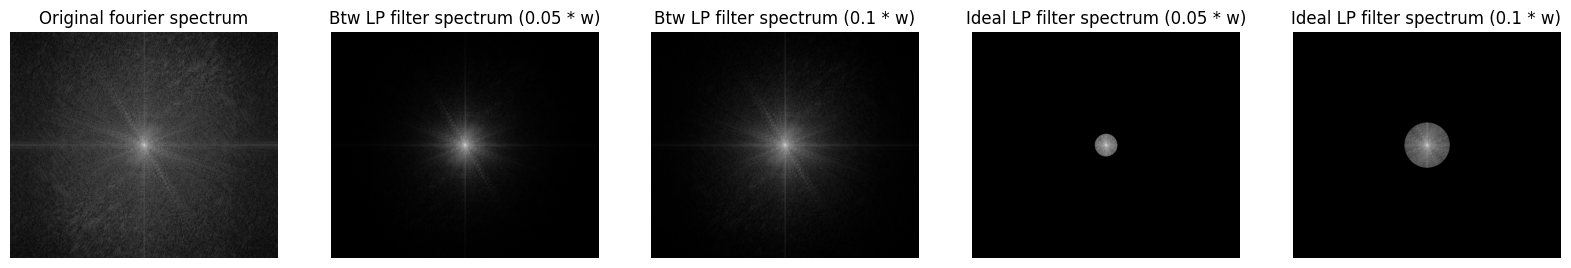

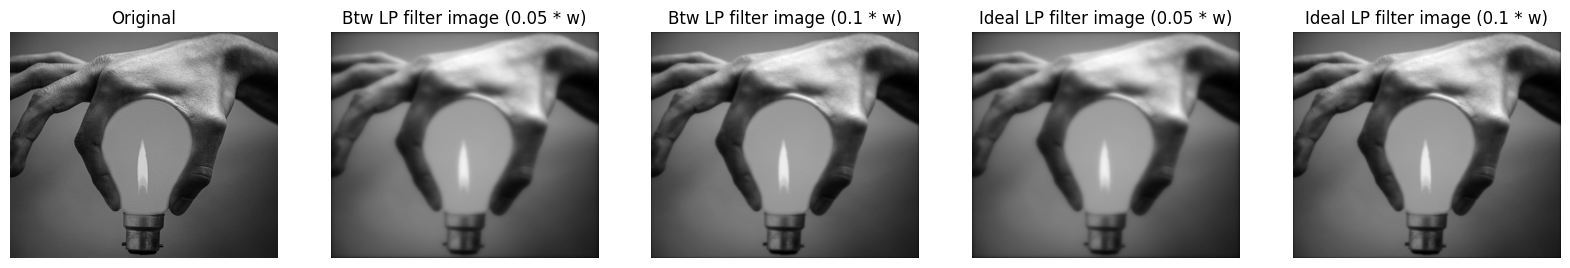

In [4]:
# show image in frequency domain
plt.figure(figsize=(20,15))
plt.subplot(1, 5, 1)
plt.title("Original fourier spectrum")
plt.imshow(ft, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 2)
plt.title("Btw LP filter spectrum (0.05 * w)")
plt.imshow(display_1, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 3)
plt.title("Btw LP filter spectrum (0.1 * w)")
plt.imshow(display_2, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 4)
plt.title("Ideal LP filter spectrum (0.05 * w)")
plt.imshow(display_3, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 5)
plt.title("Ideal LP filter spectrum (0.1 * w)")
plt.imshow(display_4, cmap="gray")
plt.axis("off")
plt.show()

# show image in spatial domain
plt.figure(figsize=(20,15))
plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(lamp_gray, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 2)
plt.title("Btw LP filter image (0.05 * w)")
plt.imshow(LPF_1, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 3)
plt.title("Btw LP filter image (0.1 * w)")
plt.imshow(LPF_2, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 4)
plt.title("Ideal LP filter image (0.05 * w)")
plt.imshow(LPF_1, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 5)
plt.title("Ideal LP filter image (0.1 * w)")
plt.imshow(LPF_2, cmap="gray")
plt.axis("off")
plt.show()

Untuk kedua tipe lowpass filtering butterworth maupun ideal, **semakin tinggi** nilai **d0** maka gambar akan **semakin bagus**. **Semakin kecil** nilai **d0** maka **semakin buruk** gambar yang dihasilkan. Berdasarkan gambar di atas tidak terlalu terlihat tipe mana yang menghasilkan gambar yang lebih baik.

### c. [17] Tampilkan citra pada domain spasial dan domain frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya!

In [5]:
# Create butterworth highpass filter
h1 = helper.hpfilter('btw', w, l, 0.05 * w)
h2 = helper.hpfilter('btw', w, l, 0.1 * w)

# Create ideal highpass filter
h3 = helper.hpfilter('ideal', w, l, 0.05 * w)
h4 = helper.hpfilter('ideal', w, l, 0.1 * w)

# Calculate DFT
f = fp.fft2(lamp_gray,(w,l))

# Apply highpass filter
HPFS_1 = h1 * f
HPFS_2 = h2 * f
HPFS_3 = h3 * f
HPFS_4 = h4 * f

# Calculate IDFT for spatial domain transformation
HPF_1 = fp.ifft2(HPFS_1).real
HPF_1 = HPF_1[:lamp_gray.shape[0],:lamp_gray.shape[1]]

HPF_2 = fp.ifft2(HPFS_2).real
HPF_2 = HPF_2[:lamp_gray.shape[0],:lamp_gray.shape[1]]

HPF_3 = fp.ifft2(HPFS_3).real
HPF_3 = HPF_3[:lamp_gray.shape[0],:lamp_gray.shape[1]]

HPF_4 = fp.ifft2(HPFS_4).real
HPF_4 = HPF_4[:lamp_gray.shape[0],:lamp_gray.shape[1]]

# Shifting for fourier spectrum display
display_1 = fp.fftshift(HPFS_1)
display_2 = fp.fftshift(HPFS_2)
display_3 = fp.fftshift(HPFS_3)
display_4 = fp.fftshift(HPFS_4)

# Scaling for fourier spectrum display
display_1 = np.log(1+abs(display_1))
display_2 = np.log(1+abs(display_2))
display_3 = np.log(1+abs(display_3))
display_4 = np.log(1+abs(display_4))

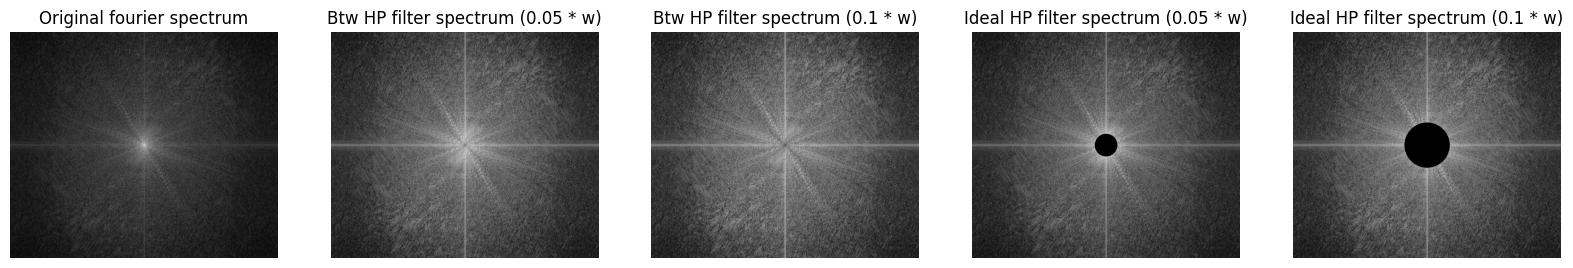

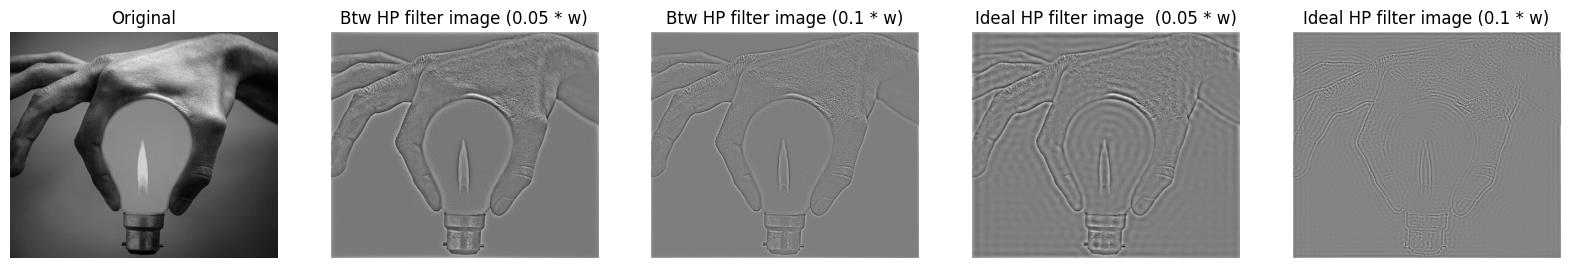

In [6]:
# show image in frequency domain
plt.figure(figsize=(20,15))
plt.subplot(1, 5, 1)
plt.title("Original fourier spectrum")
plt.imshow(ft, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 2)
plt.title("Btw HP filter spectrum (0.05 * w)")
plt.imshow(display_1, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 3)
plt.title("Btw HP filter spectrum (0.1 * w)")
plt.imshow(display_2, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 4)
plt.title("Ideal HP filter spectrum (0.05 * w)")
plt.imshow(display_3, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 5)
plt.title("Ideal HP filter spectrum (0.1 * w)")
plt.imshow(display_4, cmap="gray")
plt.axis("off")
plt.show()

# show image in spatial domain
plt.figure(figsize=(20,15))
plt.subplot(1, 5, 1)
plt.title("Original")
plt.imshow(lamp_gray, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 2)
plt.title("Btw HP filter image (0.05 * w)")
plt.imshow(HPF_1, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 3)
plt.title("Btw HP filter image (0.1 * w)")
plt.imshow(HPF_2, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 4)
plt.title("Ideal HP filter image  (0.05 * w)")
plt.imshow(HPF_3, cmap="gray")
plt.axis("off")
plt.subplot(1, 5, 5)
plt.title("Ideal HP filter image (0.1 * w)")
plt.imshow(HPF_4, cmap="gray")
plt.axis("off")
plt.show()

Untuk kedua tipe highpass filtering butterworth maupun ideal, **semakin kecil** nilai **d0** maka akan **semakin terlihat edge dari gambar**. **Semakin tinggi** nilai **d0** maka **semakin tidak terlihat edge dari gambar**. Berdasarkan gambar di atas butterworth menghasilkan gambar yang lebih baik dibandingkan dengan ideal.

### d. [6] Bagaimana pengaruh dari nilai D0 yang anda gunakan pada bagian (b) dan (c)?

Pada bagian (b) tampak gambar dengan $ d_0 = 0.05w $ lebih blur daripada gambar dengan $ d_0 = 0.1w $. Radius frekuensi yang diperbolehkan pada gambar yang menggunakan $ d_0 = 0.05w $ lebih kecil daripada gambar yang menggunakan $ d_0 = 0.1w $ sehingga mungkin ada informasi yang hilang mengenai gambar tersebut di frekuensi tinggi.<br><br>
Pada bagian (c) tampak gambar dengan $ d_0 = 0.05w $ memiliki tingkat detail yang lebih baik dari gambar dengan $d_0 = 0.1w$. Radius yang lebih kecil pada highpass filter pada gambar yang menggunakan $ d_0 = 0.05w $ membuat gambar tersebut dapat memperoleh lebih banyak informasi dari gambar yang menggunakan $ d_0 = 0.1w $ sehingga detailnya lebih baik.

## 2. [55] Berikut adalah citra noisy_bird.jpg yang corrupted sehingga menimbulkan pattern noise.

### a. [5] Tampilkan citra tersebut pada domain frekuensi!

In [7]:
# Cek gambar apakah sudah grayscale atau belum
def rgb2grey(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

    else:
        print('Current image is already in grayscale.')
        return rgb

In [8]:
noisy_bird = io.imread("noisy_bird.jpg")
rgb2grey(noisy_bird)

Current image is already in grayscale.


array([[127, 131, 135, ..., 128, 119, 111],
       [ 98, 122, 151, ..., 141, 116,  99],
       [118, 134, 150, ..., 145, 133, 126],
       ...,
       [ 30,  44,  61, ..., 119, 119, 123],
       [ 69,  61,  47, ...,  94, 121, 140],
       [ 79,  64,  44, ...,  96, 125, 141]], dtype=uint8)

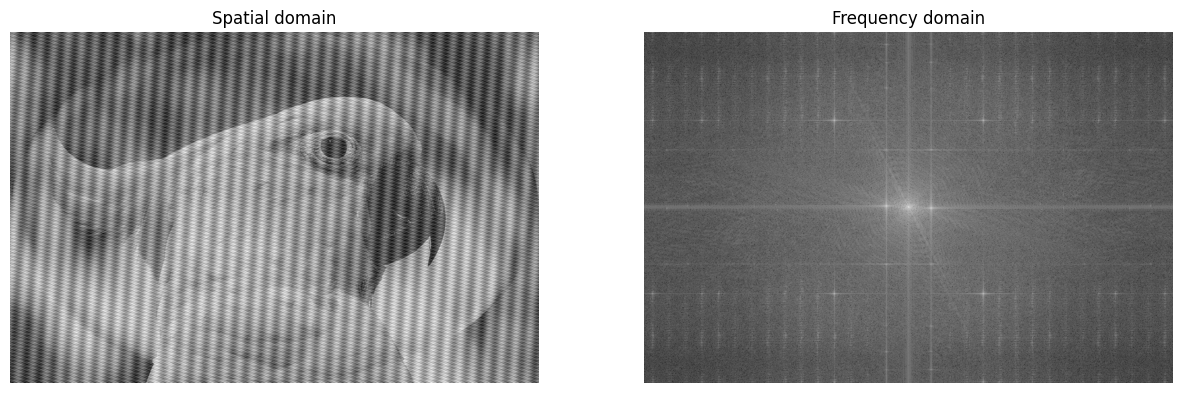

In [9]:
noisy_bird = io.imread("noisy_bird.jpg")

# fourier transform
fourier = fp.fft2(noisy_bird)

# Calculate magnitude of imaginary and real numbers
ft = abs(fourier)

# Scale image
ft = np.log(1 + ft)

# shift to center 
ft = fp.fftshift(ft)

# show image
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title("Spatial domain")
plt.imshow(noisy_bird, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Frequency domain")
plt.imshow(ft, cmap="gray")
plt.axis("off")
plt.show()

### b. [30] Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!

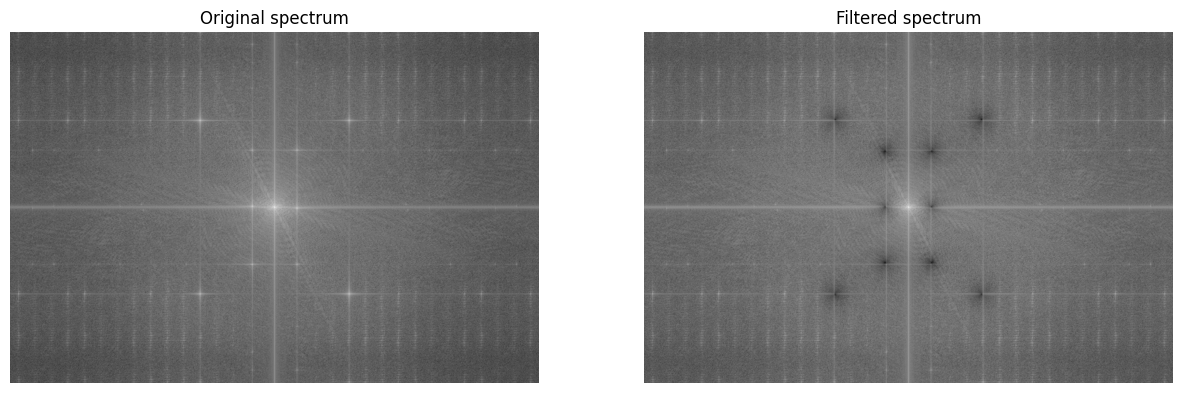

In [10]:
w, l = helper.paddedsize(noisy_bird.shape[0], noisy_bird.shape[1])

# notch filter
H1 = helper.notch('btw', w, l, 60, -252, 300)
H2 = helper.notch('btw', w, l, 60, -252, -300)
H3 = helper.notch('btw', w, l, 60, 252, 300)
H4 = helper.notch('btw', w, l, 60, 252, -300)
H5 = helper.notch('btw', w, l, 60, -80, 192)
H6 = helper.notch('btw', w, l, 60, -80, -192)
H7 = helper.notch('btw', w, l, 60, 80, 192)
H8 = helper.notch('btw', w, l, 60, 80, -192)
H9 = helper.notch('btw', w, l, 60, 80, 0)
H10 = helper.notch('btw', w, l, 60, -80, 0)

# Calculate DFT
f = fp.fft2(noisy_bird,(w,l))

# Apply notch filter
NFS_1 = f*H1*H2*H3*H4*H5*H6*H7*H8*H9*H10

# Calculate IDFT for spatial domain transformation
NF_1 = fp.ifft2(NFS_1).real
NF_1 = NF_1[:noisy_bird.shape[0],:noisy_bird.shape[1]]

# Shifting for fourier spectrum display
display_1 = fp.fftshift(NFS_1)
display_2 = fp.fftshift(np.array(f))

# Scaling for fourier spectrum display
display_1 = np.log(1+abs(display_1))
display_2 = np.log(1+abs(display_2))

# show spectrum
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.title("Original spectrum")
plt.imshow(display_2, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Filtered spectrum")
plt.imshow(display_1, cmap="gray")
plt.axis("off")
plt.show()

Saya menggunakan notch filtering untuk menghilangkan noise pada gambar. Karena kita bisa memilih frekuensi spesifik yang ingin kita hilangkan dari gambar.

### c. [25] Tampilkan perbandingan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi serta ceritakan hasilnya!

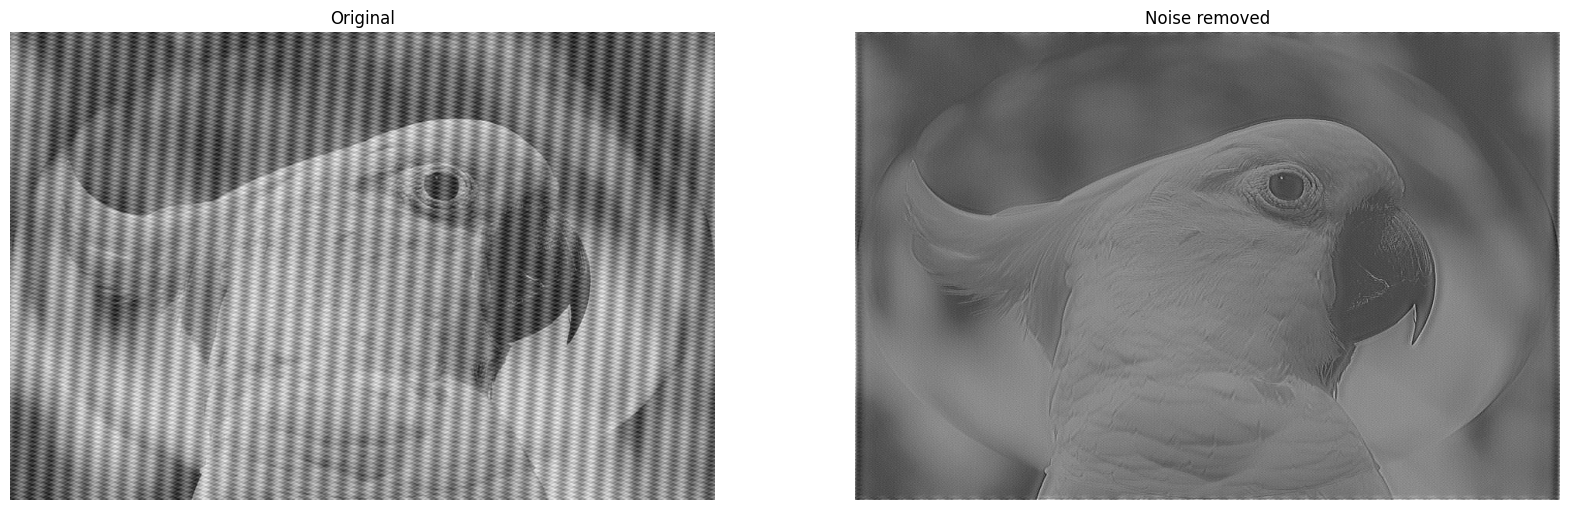

In [11]:
# show image
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(noisy_bird, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Noise removed")
plt.imshow(NF_1, cmap="gray")
plt.axis("off")
plt.show()

Setelah melakukan filtering, noise yang sebelumnya ada pada gambar sudah hilang. Gambar menjadi lebih bersih walaupun masih terlihat sedikit buram.